In [2]:
# Start loading the file drive/MyDrive/PYTHON/cifar-100-python

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

dict_test = unpickle('drive/MyDrive/PYTHON/cifar-100-python/test')
dict_train = unpickle('drive/MyDrive/PYTHON/cifar-100-python/train')
dict_meta = unpickle('drive/MyDrive/PYTHON/cifar-100-python/meta')

# End loading the file

In [3]:
print(dict_test)
print(dict_test.keys())
print(dict_train)
print(dict_train.keys())
print(dict_meta)
print(dict_meta.keys())

{b'filenames': [b'volcano_s_000012.png', b'woods_s_000412.png', b'seal_s_001803.png', b'mushroom_s_001755.png', b'adriatic_sea_s_000653.png', b'tulipa_clusiana_s_000175.png', b'camel_s_001052.png', b'mourning_cloak_s_000143.png', b'cirrostratus_s_000223.png', b'eating_apple_s_000763.png', b'adriatic_s_000380.png', b'skunk_s_001175.png', b'streetcar_s_000382.png', b'sounding_rocket_s_000010.png', b'lamp_s_001350.png', b'king_of_beasts_s_001221.png', b'tulipa_clusiana_s_000186.png', b'timber_wolf_s_000622.png', b'rose_s_002192.png', b'valencia_orange_s_001542.png', b'mountain_rose_s_000209.png', b'mount_s_002678.png', b'striped_skunk_s_001304.png', b'dinosaur_s_000326.png', b'chimpanzee_s_000134.png', b'oilcan_s_000656.png', b'keyboard_s_001529.png', b'safety_bike_s_000390.png', b'bike_s_000658.png', b'rose_s_000120.png', b'chaise_s_001826.png', b'fishplate_s_000669.png', b'motor_mower_s_000528.png', b'sea_turtle_s_000882.png', b'elaeis_guineensis_s_000412.png', b'mackerel_shark_s_001042

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00


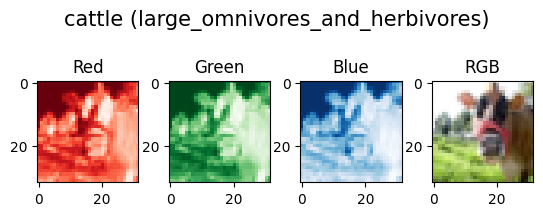

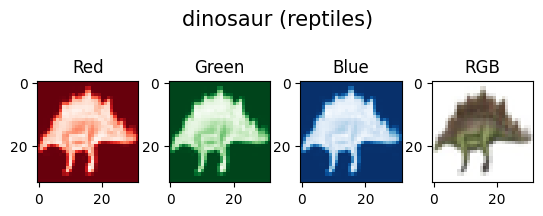

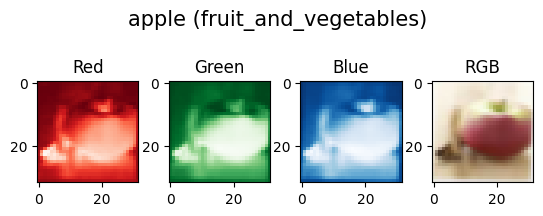

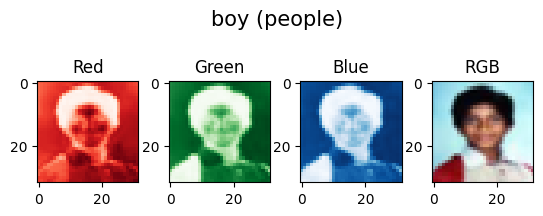

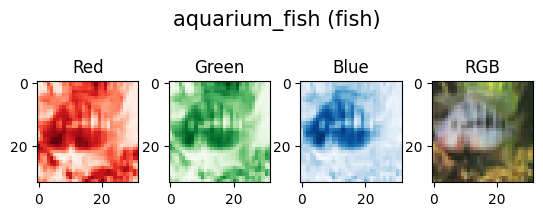

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
!pip install Keras-Preprocessing

def rgbOUT(dataArr, dataName, dataCat):
  red = dataArr[0:1024].reshape(32,32)
  green = dataArr[1024:2048].reshape(32,32)
  blue = dataArr[2048:3072].reshape(32,32)
  plt.imshow(np.dstack((red, green, blue)))
  title = (str(dataName).replace("b'", "")+" ("+str(dataCat).replace("b'", "")+")")
  title = title.replace("'", "")
  plt.suptitle(title, fontsize=20, linespacing=30, y=1.02)
  plt.show()

def rgbOUTseparate(dataArr, dataName, dataCat):
  red = dataArr[0:1024].reshape(32,32)
  green = dataArr[1024:2048].reshape(32,32)
  blue = dataArr[2048:3072].reshape(32,32)
  f, axarr = plt.subplots(1, 4)
  title = (str(dataName).replace("b'", "")+" ("+str(dataCat).replace("b'", "")+")")
  title = title.replace("'", "")
  plt.suptitle(title, fontsize=15, y=0.75)
  axarr[0].imshow(red, cmap='Reds')
  axarr[0].set_title('Red')
  axarr[1].imshow(green, cmap='Greens')
  axarr[1].set_title('Green')
  axarr[2].imshow(blue, cmap='Blues')
  axarr[2].set_title('Blue')
  axarr[3].imshow(np.dstack((red, green, blue)))
  axarr[3].set_title('RGB')
  f.subplots_adjust(hspace=0.2)
  f.subplots_adjust(wspace=0.3)
  # plt.setp([a.get_yticklabels() for a in axarr[1:]], visible=False)
  plt.show()

def rgbOUTseparatePred(dataArr, dataName, dataCat, dataPred):
  red = dataArr[0:1024].reshape(32,32)
  green = dataArr[1024:2048].reshape(32,32)
  blue = dataArr[2048:3072].reshape(32,32)
  f, axarr = plt.subplots(1, 4)
  title = (str(dataName).replace("b'", "")+" (predicted: "+str(dataPred).replace("b'", "")+")")
  title = title.replace("'", "")
  plt.suptitle(title, fontsize=15, y=0.75)
  axarr[0].imshow(red, cmap='Reds')
  axarr[0].set_title('Red')
  axarr[1].imshow(green, cmap='Greens')
  axarr[1].set_title('Green')
  axarr[2].imshow(blue, cmap='Blues')
  axarr[2].set_title('Blue')
  axarr[3].imshow(np.dstack((red, green, blue)))
  axarr[3].set_title('RGB')
  f.subplots_adjust(hspace=0.2)
  f.subplots_adjust(wspace=0.3)
  # plt.setp([a.get_yticklabels() for a in axarr[1:]], visible=False)
  plt.show()

for i in range(5):
  rgbOUTseparate(dict_train[b'data'][i], dict_meta[b'fine_label_names'][dict_train[b'fine_labels'][i]], dict_meta[b'coarse_label_names'][dict_train[b'coarse_labels'][i]])
  #rgbOUT(dict_train[b'data'][i], dict_meta[b'fine_label_names'][dict_train[b'fine_labels'][i]], dict_meta[b'coarse_label_names'][dict_train[b'coarse_labels'][i]])

In [5]:
# Actual Machine Learning Time

# Model / data parameters
num_classes = 100
num_superclasses = 20
input_shape = (32, 32, 3)

# Load the data and split it between train and test sets **USING ONLY CLASSES FIRST**
(x_trainOld, y_train) = (dict_train[b'data'], dict_train[b'fine_labels'])
(x_testOld, y_test) = (dict_test[b'data'], dict_test[b'fine_labels'])

# Scale images to the [0, 1] range
x_trainOld = x_trainOld.astype("float32") / 255
x_testOld = x_testOld.astype("float32") / 255
# Make sure images have shape (32, 32, 3)
x_train = np.zeros((len(x_trainOld), 32, 32, 3))
x_test = np.zeros((len(x_testOld), 32, 32, 3))

for i in range(len(x_trainOld)):
  red = x_trainOld[i][0:1024].reshape(32,32)
  green = x_trainOld[i][1024:2048].reshape(32,32)
  blue = x_trainOld[i][2048:3072].reshape(32,32)
  x_train[i] = np.dstack((red, green, blue))

for i in range(len(x_testOld)):
  red = x_testOld[i][0:1024].reshape(32,32)
  green = x_testOld[i][1024:2048].reshape(32,32)
  blue = x_testOld[i][2048:3072].reshape(32,32)
  x_test[i] = np.dstack((red, green, blue))

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [10]:
'''
# 5-27-5pm-basic

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
'''
'''
# 5-29-1pm-added

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

'''

# 5-29-8pm-bn

from keras import preprocessing

data_augmentation_layer = keras.Sequential([
  layers.RandomFlip('horizontal'),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
], name='data_augmentation')

batch_normalization = layers.BatchNormalization()
batch_normalization2 = layers.BatchNormalization()
batch_normalization3 = layers.BatchNormalization()
batch_normalization4 = layers.BatchNormalization()
batch_normalization5 = layers.BatchNormalization()
batch_normalization6 = layers.BatchNormalization()

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        data_augmentation_layer,
        layers.Conv2D(96, kernel_size=(3, 3), activation="relu"),
        batch_normalization,
        layers.Conv2D(96, kernel_size=(3, 3), activation="relu"),
        batch_normalization2,
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        batch_normalization3,
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        batch_normalization6,
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        batch_normalization4,
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        batch_normalization5,
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(300, activation="relu"),
        layers.Dropout(0.25),
        layers.Dense(180, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# try out data augmentation

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,020 (320.39 KB)

 Trainable params: 82,020 (320.39 KB)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
batch_size = 32
epochs = 200
np.random.seed(0)
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.optimizer.learning_rate = 0.001
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[callback])

Epoch 1/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.0412 - loss: 4.3316 - val_accuracy: 0.1364 - val_loss: 3.7363
Epoch 2/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1379 - loss: 3.6602 - val_accuracy: 0.2118 - val_loss: 3.3086
Epoch 3/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1869 - loss: 3.3987 - val_accuracy: 0.2390 - val_loss: 3.1525
Epoch 4/200
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2125 - loss: 3.2731 - val_accuracy: 0.2532 - val_loss: 3.0525
Epoch 5/200
 892/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2352 - loss: 3.1451

KeyboardInterrupt: 

In [ ]:
print(model.optimizer.learning_rate)

<Variable path=adam/learning_rate, shape=(), dtype=float32, value=0.0010000000474974513>


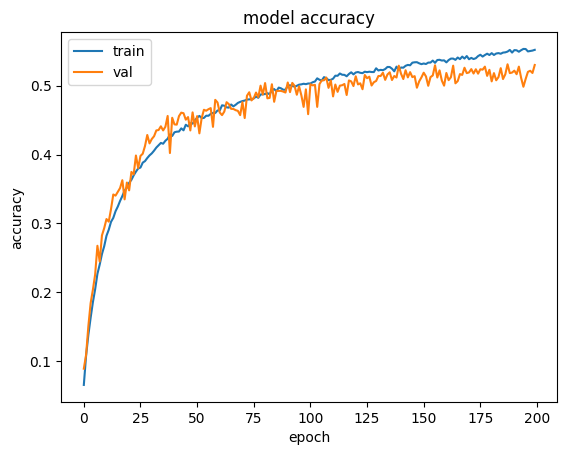

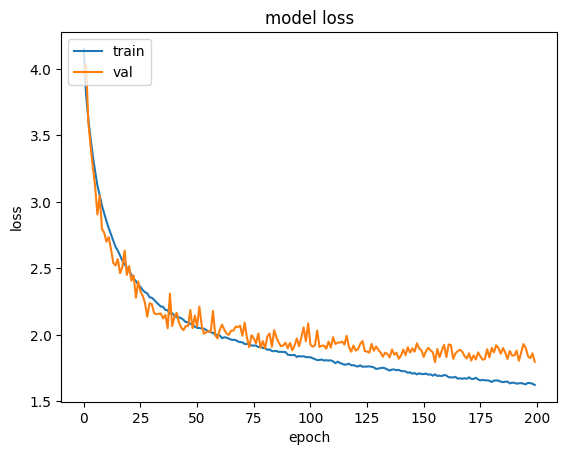

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [8]:
print([(key, round(value[0], 4)) for key, value in history.history.items()])

# Save trained model

model.save("5-29-8pm-bn.keras")

[('accuracy', 0.0656), ('loss', 4.1512), ('val_accuracy', 0.0892), ('val_loss', 3.9632)]


In [6]:
model = keras.models.load_model("5-29-8pm-bn.keras")

predictions = model.predict(x_test)
predictNum = np.argmax(predictions, axis=1)
y_testNum = np.argmax(y_test, axis=1)

for i in range(50):
  rgbOUTseparatePred(dict_test[b'data'][i], dict_meta[b'fine_label_names'][dict_test[b'fine_labels'][i]], dict_meta[b'coarse_label_names'][dict_test[b'coarse_labels'][i]], dict_meta[b'fine_label_names'][predictNum[i]])

ValueError: File not found: filepath=5-29-8pm-bn.keras. Please ensure the file is an accessible `.keras` zip file.